# General Imports

In [1]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload

In [2]:
from collections import namedtuple
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd
import seaborn as sns

In [3]:
from utils.display_images import denormalize_img
from utils import show_dataset_image, show_dataset_mask
from utils import show_prediction_images, show_prediction_uncertainty_images

In [4]:
import pacmap
from sklearn.decomposition import PCA

In [5]:
from ls_ood_detect.uncertainty_estimation import Hook
from ls_ood_detect.uncertainty_estimation import deeplabv3p_get_ls_mcd_samples
from ls_ood_detect.uncertainty_estimation import get_latent_represent_mcd_samples
from ls_ood_detect.uncertainty_estimation import get_dl_h_z
from ls_ood_detect.ood_detection_dataset import build_ood_detection_ds
from ls_ood_detect.dimensionality_reduction import plot_samples_pacmap
from ls_ood_detect.detectors import KDEClassifier, DetectorKDE
from ls_ood_detect.score import get_hz_scores
from ls_ood_detect.metrics import get_hz_detector_results
from ls_ood_detect.metrics import get_ood_detector_results
from ls_ood_detect.metrics import plot_roc_ood_detector
from ls_ood_detect.metrics import plot_auprc_ood_detector
from ls_ood_detect.dimensionality_reduction import plot_samples_pacmap
from ls_ood_detect.dimensionality_reduction import apply_pca_ds_split
from ls_ood_detect.dimensionality_reduction import apply_pca_transform

In [6]:
from icecream import ic

# Load Entropy

In [7]:
ws_unet_h_z_ws_normal_train_samples_np = np.load('./Data/EXPERIMENTS/CVPR-2024/semantic_segmentation/unet/embeddings/woodscape/entropy/ws_unet_h_z_ws_normal_train_samples_np.npy')
ws_unet_h_z_ws_normal_valid_samples_np = np.load('./Data/EXPERIMENTS/CVPR-2024/semantic_segmentation/unet/embeddings/woodscape/entropy/ws_unet_h_z_ws_normal_valid_samples_np.npy')
ws_unet_h_z_ws_normal_test_samples_np = np.load('./Data/EXPERIMENTS/CVPR-2024/semantic_segmentation/unet/embeddings/woodscape/entropy/ws_unet_h_z_ws_normal_test_samples_np.npy')

ws_unet_h_z_ws_anomal_valid_samples_np = np.load('./Data/EXPERIMENTS/CVPR-2024/semantic_segmentation/unet/embeddings/woodscape/entropy/ws_unet_h_z_ws_anomal_valid_samples_np.npy')
ws_unet_h_z_ws_anomal_test_samples_np = np.load('./Data/EXPERIMENTS/CVPR-2024/semantic_segmentation/unet/embeddings/woodscape/entropy/ws_unet_h_z_ws_anomal_test_samples_np.npy')

ws_unet_h_z_cs_valid_samples_np = np.load('./Data/EXPERIMENTS/CVPR-2024/semantic_segmentation/unet/embeddings/woodscape/entropy/ws_unet_h_z_cs_valid_samples_np.npy')
ws_unet_h_z_cs_test_samples_np = np.load('./Data/EXPERIMENTS/CVPR-2024/semantic_segmentation/unet/embeddings/woodscape/entropy/ws_unet_h_z_cs_test_samples_np.npy')

ws_unet_h_z_ws_soil_valid_samples_np = np.load('./Data/EXPERIMENTS/CVPR-2024/semantic_segmentation/unet/embeddings/woodscape/entropy/ws_unet_h_z_ws_soil_valid_samples_np.npy')
ws_unet_h_z_ws_soil_test_samples_np = np.load('./Data/EXPERIMENTS/CVPR-2024/semantic_segmentation/unet/embeddings/woodscape/entropy/ws_unet_h_z_ws_soil_test_samples_np.npy')

# Plot 2D Projections

ic| ws_unet_h_z_ind.shape: (2305, 128)
ic| ws_unet_h_z_ood.shape: (2305, 128)


(4610, 128)
(4610, 1)
(4610, 2)


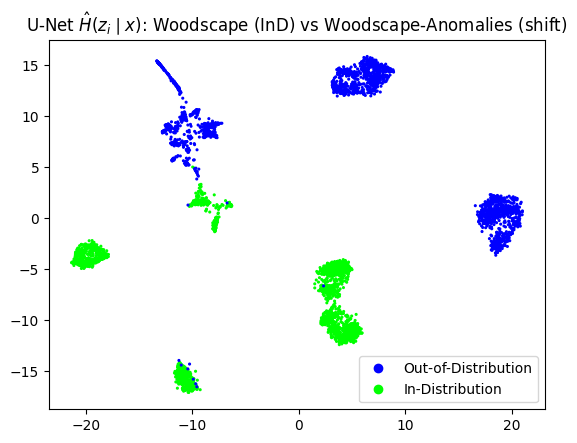

In [8]:

ws_unet_h_z_ind = np.concatenate((ws_unet_h_z_ws_normal_valid_samples_np,
                                  ws_unet_h_z_ws_normal_test_samples_np))

ws_unet_h_z_ood = np.concatenate((ws_unet_h_z_ws_anomal_valid_samples_np,
                                  ws_unet_h_z_ws_anomal_test_samples_np))

ic(ws_unet_h_z_ind.shape)
ic(ws_unet_h_z_ood.shape)

plot_samples_pacmap(ws_unet_h_z_ind,
                    ws_unet_h_z_ood,
                    neighbors=12,
                    title="U-Net $\hat{H}(z_i \mid x)$: Woodscape (InD) vs Woodscape-Anomalies (shift)")

ic| ws_unet_h_z_ind.shape: (2305, 128)
ic| ws_unet_h_z_ood.shape: (2025, 128)


(4330, 128)
(4330, 1)
(4330, 2)


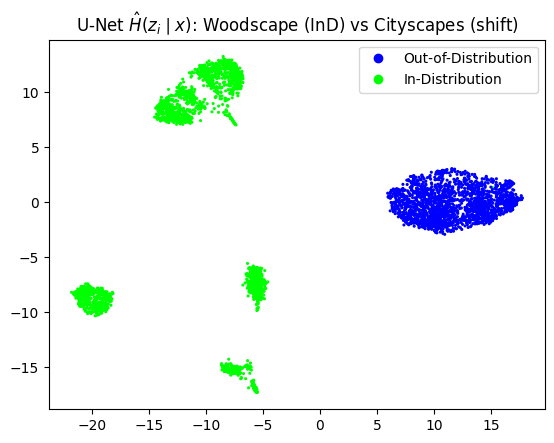

In [9]:
ws_unet_h_z_ind = np.concatenate((ws_unet_h_z_ws_normal_valid_samples_np,
                                  ws_unet_h_z_ws_normal_test_samples_np))

ws_unet_h_z_ood = np.concatenate((ws_unet_h_z_cs_valid_samples_np,
                                  ws_unet_h_z_cs_test_samples_np))

ic(ws_unet_h_z_ind.shape)
ic(ws_unet_h_z_ood.shape)

plot_samples_pacmap(ws_unet_h_z_ind,
                    ws_unet_h_z_ood,
                    neighbors=12,
                    title="U-Net $\hat{H}(z_i \mid x)$: Woodscape (InD) vs Cityscapes (shift)")

ic| ws_unet_h_z_ind.shape: (2305, 128)
ic| ws_unet_h_z_ood.shape: (1800, 128)


(4105, 128)
(4105, 1)
(4105, 2)


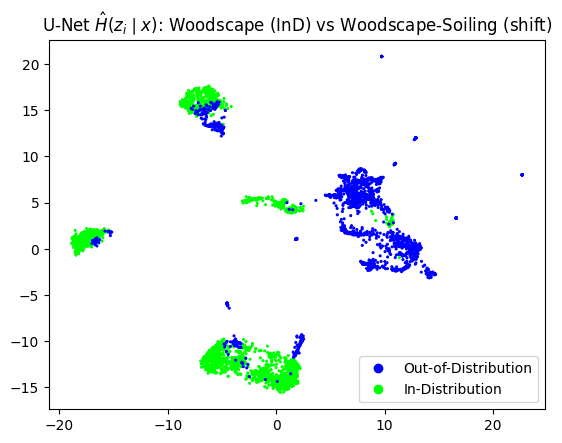

In [10]:

ws_unet_h_z_ind = np.concatenate((ws_unet_h_z_ws_normal_valid_samples_np,
                                  ws_unet_h_z_ws_normal_test_samples_np))

ws_unet_h_z_ood = np.concatenate((ws_unet_h_z_ws_soil_valid_samples_np,
                                  ws_unet_h_z_ws_soil_test_samples_np))

ic(ws_unet_h_z_ind.shape)
ic(ws_unet_h_z_ood.shape)

plot_samples_pacmap(ws_unet_h_z_ind,
                    ws_unet_h_z_ood,
                    neighbors=12,
                    title="U-Net $\hat{H}(z_i \mid x)$: Woodscape (InD) vs Woodscape-Soiling (shift)")

# Load Entropy

In [17]:
ws_unet_h_z_ws_normal_train_samples_np = np.load('./Data/EXPERIMENTS/CVPR-2024/semantic_segmentation/unet/embeddings/woodscape/entropy/ws_unet_h_z_ws_normal_train_samples_np.npy')
ws_unet_h_z_ws_normal_valid_samples_np = np.load('./Data/EXPERIMENTS/CVPR-2024/semantic_segmentation/unet/embeddings/woodscape/entropy/ws_unet_h_z_ws_normal_valid_samples_np.npy')
ws_unet_h_z_ws_normal_test_samples_np = np.load('./Data/EXPERIMENTS/CVPR-2024/semantic_segmentation/unet/embeddings/woodscape/entropy/ws_unet_h_z_ws_normal_test_samples_np.npy')

ws_unet_h_z_ws_anomal_valid_samples_np = np.load('./Data/EXPERIMENTS/CVPR-2024/semantic_segmentation/unet/embeddings/woodscape/entropy/ws_unet_h_z_ws_anomal_valid_samples_np.npy')
ws_unet_h_z_ws_anomal_test_samples_np = np.load('./Data/EXPERIMENTS/CVPR-2024/semantic_segmentation/unet/embeddings/woodscape/entropy/ws_unet_h_z_ws_anomal_test_samples_np.npy')

ws_unet_h_z_cs_valid_samples_np = np.load('./Data/EXPERIMENTS/CVPR-2024/semantic_segmentation/unet/embeddings/woodscape/entropy/ws_unet_h_z_cs_valid_samples_np.npy')
ws_unet_h_z_cs_test_samples_np = np.load('./Data/EXPERIMENTS/CVPR-2024/semantic_segmentation/unet/embeddings/woodscape/entropy/ws_unet_h_z_cs_test_samples_np.npy')

ws_unet_h_z_ws_soil_valid_samples_np = np.load('./Data/EXPERIMENTS/CVPR-2024/semantic_segmentation/unet/embeddings/woodscape/entropy/ws_unet_h_z_ws_soil_valid_samples_np.npy')
ws_unet_h_z_ws_soil_test_samples_np = np.load('./Data/EXPERIMENTS/CVPR-2024/semantic_segmentation/unet/embeddings/woodscape/entropy/ws_unet_h_z_ws_soil_test_samples_np.npy')

# Dimensionality Reduction PCA

In [18]:
pca_ws_unet_h_z_ws_normal_train_samples_np, pca_tr = apply_pca_ds_split(samples=ws_unet_h_z_ws_normal_train_samples_np,
                                                                        nro_components=50)

In [19]:
pca_ws_unet_h_z_ws_normal_valid_samples_np = apply_pca_transform(ws_unet_h_z_ws_normal_valid_samples_np, pca_tr) # InD
pca_ws_unet_h_z_ws_normal_test_samples_np = apply_pca_transform(ws_unet_h_z_ws_normal_test_samples_np, pca_tr) # InD

pca_ws_unet_h_z_ws_anomal_valid_samples_np = apply_pca_transform(ws_unet_h_z_ws_anomal_valid_samples_np, pca_tr) # OoD | shifted
pca_ws_unet_h_z_ws_anomal_test_samples_np = apply_pca_transform(ws_unet_h_z_ws_anomal_test_samples_np, pca_tr) # OoD | shifted

pca_ws_unet_h_z_cs_valid_samples_np = apply_pca_transform(ws_unet_h_z_cs_valid_samples_np, pca_tr) # OoD | shifted
pca_ws_unet_h_z_cs_test_samples_np = apply_pca_transform(ws_unet_h_z_cs_test_samples_np, pca_tr) # OoD | shifted

pca_ws_unet_h_z_ws_soil_valid_samples_np = apply_pca_transform(ws_unet_h_z_ws_soil_valid_samples_np, pca_tr) # OoD | shifted
pca_ws_unet_h_z_ws_soil_test_samples_np = apply_pca_transform(ws_unet_h_z_ws_soil_test_samples_np, pca_tr) # OoD | shifted

# Experiment 2: PCA Dataset - Train Data Reference

In [21]:
ic(pca_ws_unet_h_z_ws_normal_train_samples_np.shape);
ic(pca_ws_unet_h_z_ws_normal_valid_samples_np.shape);
ic(pca_ws_unet_h_z_ws_normal_test_samples_np.shape);
ic(pca_ws_unet_h_z_ws_anomal_valid_samples_np.shape);
ic(pca_ws_unet_h_z_ws_anomal_test_samples_np.shape);
ic(pca_ws_unet_h_z_cs_valid_samples_np.shape);
ic(pca_ws_unet_h_z_cs_test_samples_np.shape);
ic(pca_ws_unet_h_z_ws_soil_valid_samples_np.shape);
ic(pca_ws_unet_h_z_ws_soil_test_samples_np.shape);

ic| pca_ws_unet_h_z_ws_normal_train_samples_np.shape: (5929, 50)


ic| pca_ws_unet_h_z_ws_normal_valid_samples_np.shape: (1482, 50)
ic| pca_ws_unet_h_z_ws_normal_test_samples_np.shape: (823, 50)
ic| pca_ws_unet_h_z_ws_anomal_valid_samples_np.shape: (1482, 50)
ic| pca_ws_unet_h_z_ws_anomal_test_samples_np.shape: (823, 50)
ic| pca_ws_unet_h_z_cs_valid_samples_np.shape: (500, 50)
ic| pca_ws_unet_h_z_cs_test_samples_np.shape: (1525, 50)
ic| pca_ws_unet_h_z_ws_soil_valid_samples_np.shape: (800, 50)
ic| pca_ws_unet_h_z_ws_soil_test_samples_np.shape: (1000, 50)


In [22]:
pca_ws_unet_ind_ws_normal_h_z = np.concatenate((pca_ws_unet_h_z_ws_normal_valid_samples_np,
                                                pca_ws_unet_h_z_ws_normal_test_samples_np))

pca_ws_unet_ood_ws_anomal_h_z = np.concatenate((pca_ws_unet_h_z_ws_anomal_valid_samples_np,
                                                pca_ws_unet_h_z_ws_anomal_test_samples_np))

pca_ws_unet_ood_cs_h_z = np.concatenate((pca_ws_unet_h_z_cs_valid_samples_np,
                                         pca_ws_unet_h_z_cs_test_samples_np))

pca_ws_unet_ood_ws_soil_h_z = np.concatenate((pca_ws_unet_h_z_ws_soil_valid_samples_np,
                                              pca_ws_unet_h_z_ws_soil_test_samples_np))

ic(pca_ws_unet_ind_ws_normal_h_z.shape);
ic(pca_ws_unet_ood_ws_anomal_h_z.shape);
ic(pca_ws_unet_ood_cs_h_z.shape);
ic(pca_ws_unet_ood_ws_soil_h_z.shape);

ic| pca_ws_unet_ind_ws_normal_h_z.shape: (2305, 50)
ic| pca_ws_unet_ood_ws_anomal_h_z.shape: (2305, 50)
ic| pca_ws_unet_ood_cs_h_z.shape: (2025, 50)
ic| pca_ws_unet_ood_ws_soil_h_z.shape: (1800, 50)


## Build Detector

In [24]:
ws_unet_ds_shift_detector_pca = DetectorKDE(train_embeddings=pca_ws_unet_h_z_ws_normal_train_samples_np)

## Get Scores

In [25]:
scores_pca_ws_unet_ind_ws_normal_h_z = get_hz_scores(ws_unet_ds_shift_detector_pca,
                                                     pca_ws_unet_ind_ws_normal_h_z)

scores_pca_ws_unet_ood_ws_anomal_h_z = get_hz_scores(ws_unet_ds_shift_detector_pca,
                                                     pca_ws_unet_ood_ws_anomal_h_z)

scores_pca_ws_unet_ood_cs_h_z = get_hz_scores(ws_unet_ds_shift_detector_pca,
                                              pca_ws_unet_ood_cs_h_z)

scores_pca_ws_unet_ood_ws_soil_h_z = get_hz_scores(ws_unet_ds_shift_detector_pca,
                                                   pca_ws_unet_ood_ws_soil_h_z)


## Get Results

In [26]:
print("\nwoodscape-normal vs. woodscape-anomal:")
print("Test InD shape", scores_pca_ws_unet_ind_ws_normal_h_z.shape);
print("Test OoD shape", scores_pca_ws_unet_ood_ws_anomal_h_z.shape);

results_ws_anomal = get_hz_detector_results(detect_exp_name="woodscape-normal vs. wooscape-anomal",
                                            ind_samples_scores=scores_pca_ws_unet_ind_ws_normal_h_z,
                                            ood_samples_scores=scores_pca_ws_unet_ood_ws_anomal_h_z)

print("\nwoodscape-normal vs. cityscapes:")
print("Test InD shape", scores_pca_ws_unet_ind_ws_normal_h_z.shape);
print("Test OoD shape", scores_pca_ws_unet_ood_cs_h_z.shape);

results_cs = get_hz_detector_results(detect_exp_name="woodscape-normal vs. cityscapes",
                                     ind_samples_scores=scores_pca_ws_unet_ind_ws_normal_h_z,
                                     ood_samples_scores=scores_pca_ws_unet_ood_cs_h_z)

print("\nwoodscape-normal vs. woodscape-soiling:")
print("Test InD shape", scores_pca_ws_unet_ind_ws_normal_h_z.shape);
print("Test OoD shape", scores_pca_ws_unet_ood_ws_soil_h_z.shape);

results_ws_soil = get_hz_detector_results(detect_exp_name="woodscape-normal vs. woodscape-soiling",
                                          ind_samples_scores=scores_pca_ws_unet_ind_ws_normal_h_z,
                                          ood_samples_scores=scores_pca_ws_unet_ood_ws_soil_h_z)


woodscape-normal vs. woodscape-anomal:
Test InD shape (2305,)
Test OoD shape (2305,)
AUROC: 0.9728
FPR95: 0.1740
AUPR: 0.9787

woodscape-normal vs. cityscapes:
Test InD shape (2305,)
Test OoD shape (2025,)
AUROC: 0.9824
FPR95: 0.0711
AUPR: 0.9870

woodscape-normal vs. woodscape-soiling:
Test InD shape (2305,)
Test OoD shape (1800,)
AUROC: 0.9073
FPR95: 0.3594
AUPR: 0.9131


So far the best results with PCA are with: 32, 40, and 48 PCA components

## Plot Score Values Training Set Reference KDE

In [27]:
df_score_ind_ws_normal = pd.DataFrame(scores_pca_ws_unet_ind_ws_normal_h_z, columns=["LaRED score"])
df_score_ood_ws_anomal = pd.DataFrame(scores_pca_ws_unet_ood_ws_anomal_h_z, columns=["LaRED score"])
df_score_ood_cs = pd.DataFrame(scores_pca_ws_unet_ood_cs_h_z, columns=["LaRED score"])
df_score_ood_ws_soil = pd.DataFrame(scores_pca_ws_unet_ood_ws_soil_h_z, columns=["LaRED score"])

df_score_ind_ws_normal.insert(0, "Dataset", "")
df_score_ind_ws_normal.loc[:, "Dataset"] = "InD-wooscape-normal"

df_score_ood_ws_anomal.insert(0, "Dataset", "")
df_score_ood_ws_anomal.loc[:, "Dataset"] = "woodscape-anomalies"

df_score_ood_cs.insert(0, "Dataset", "")
df_score_ood_cs.loc[:, "Dataset"] = "cityscapes"

df_score_ood_ws_soil.insert(0, "Dataset", "")
df_score_ood_ws_soil.loc[:, "Dataset"] = "woodscape-soiling"

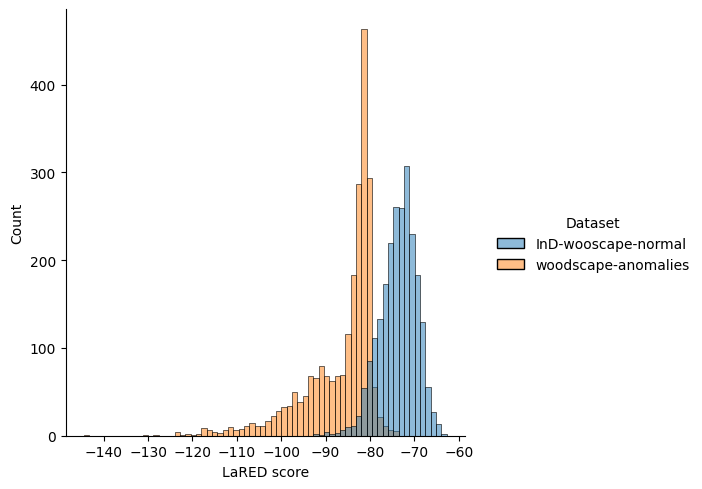

In [29]:
df_h_z_valid_scores = pd.concat([df_score_ind_ws_normal,
                                 df_score_ood_ws_anomal]).reset_index(drop=True)

sns.displot(df_h_z_valid_scores, x="LaRED score", hue="Dataset", kind="hist", fill=True)
plt.show()

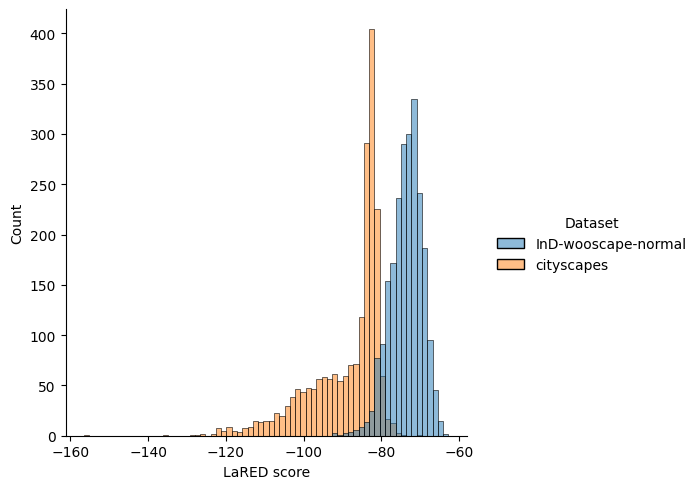

In [30]:
df_h_z_valid_scores = pd.concat([df_score_ind_ws_normal,
                                 df_score_ood_cs]).reset_index(drop=True)

sns.displot(df_h_z_valid_scores, x="LaRED score", hue="Dataset", kind="hist", fill=True)
plt.show()

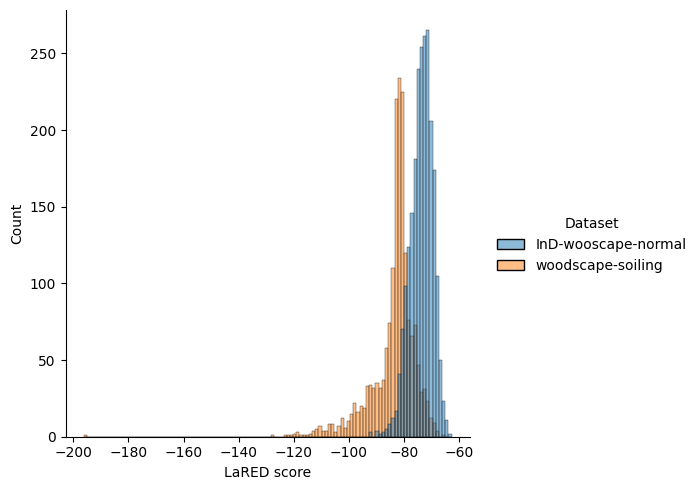

In [31]:
df_h_z_valid_scores = pd.concat([df_score_ind_ws_normal,
                                 df_score_ood_ws_soil]).reset_index(drop=True)

sns.displot(df_h_z_valid_scores, x="LaRED score", hue="Dataset", kind="hist", fill=True)
plt.show()